In [ ]:
import numpy as np
import scipy.stats as st
from scipy.integrate import quad
import sklearn.gaussian_process as gp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import math
from math import pi
 #for inlihne ploting#
%matplotlib inline                        
np.set_printoptions(precision=2,suppress=True)

##### In this module we will try to find minima of a test function using gaussian process

##We assume an underlying function such that we know about the function and we can test our Gaussian Process based surrogate model
The assumed test function is
y = Sin(x^x)/2^(x^x-pi/2)/pi)
(The function is choosen from idea of its reseblance with damping wave at some level) 


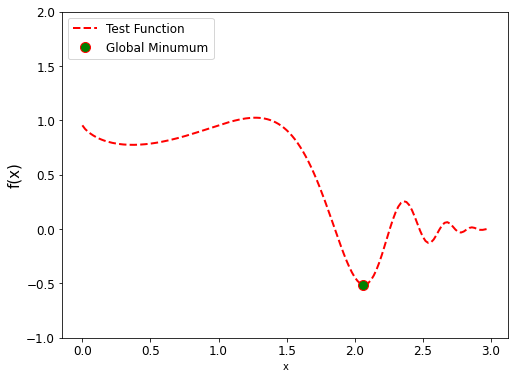

In [ ]:
#Test function
x = np.arange(0, 3.00, 0.02)
y_test =np.sin(x**x)/(2**((x**x-pi/2)/pi))

#To Display Test Function
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y_test, 'r--', linewidth=2,label='Test Function')
ax.set_xlabel('x')
ax.set_ylabel('f(x)', fontsize=15)
ax.set_ylim([-1,2])

#Display global minimum
min_index = np.argmin(y_test)
ax.plot(x[min_index], y_test[min_index], 'ro',markerfacecolor='g',markersize=10,label='Global Minumum')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc='upper left', prop={'size': 12});
#plt.savefig('Testfunction.png')

#### In a actual setting however f(x) is unknown and actual values of f(x) are caluculated using time consuming, costly and complicated computer simulation.
#Therefore for the next part we'll consider
1 f(x) as a black-box function
2 limit number of f(x) evaluations 
3 We will use surrogate optimisation to achieve this goal

#Gaussian Process model training

In [ ]:
#initial training 
x_train = np.array([[0,0.1,0.3,0.5,0.9,1.3,1.6,2.1,2.6,3.0]]).T
y_train = np.sin(x_train**x_train)/(2**((x_train**x_train-pi/2)/pi))

In [ ]:
#Train gaussian process(GP) model
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(1.0, (1e-3, 1e3))
#A kernel(or covariance function) describes the covariance of the Gaussian process random variables
model = gp.GaussianProcessRegressor(kernel=kernel, 
                                    optimizer='fmin_l_bfgs_b',
                                    n_restarts_optimizer=30, 
                                    alpha=1e-10, 
                                    normalize_y=True)
model.fit(x_train, y_train)
# GP prediction
y_pred, pred_std = model.predict(x.reshape((-1, 1)), return_std=True)
pred_std



array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.01,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01,
       0.  , 0.  , 0.  , 0.01, 0.01, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01, 0.  ,
       0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.02, 0.02,
       0.02, 0.01, 0.01, 0.  , 0.01, 0.02, 0.02, 0.03, 0.04, 0.05, 0.06,
       0.07, 0.07, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.08, 0.08, 0.07,
       0.07, 0.06, 0.05, 0.04, 0.03, 0.01, 0.  , 0.01, 0.03, 0.04, 0.05,
       0.06, 0.07, 0.08, 0.09, 0.1 , 0.1 , 0.11, 0.11, 0.11, 0.11, 0.11,
       0.1 , 0.09, 0.09, 0.08, 0.06, 0.05, 0.04, 0.03, 0.01, 0.  , 0.01,
       0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09,
       0.08, 0.08, 0.07, 0.06, 0.05, 0.03, 0.02])

In [ ]:
#CHECK GP PREDICTION ACCURACY
ax.plot(x_train,y_train,'bo',markersize=10,label='training Data')
ax.plot(x,y_pred,'b',linewidth=2,label='GP prediction')
ax.tick_params(axis='both',which='major',labelsize=12)


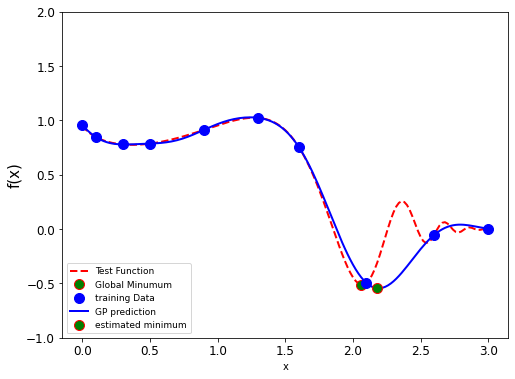

In [ ]:
#Find minima of prediction
index=np.argmin(y_pred)
currentlocation = x[index]
currentobjective = y_pred[index]
#ax.plot(currentlocation,currentobjective,'go',markerfacecolor='g',markersize=10,label='Estimated Minimum');
ax.plot(currentlocation,currentobjective,'ro',markerfacecolor='g',markersize =10, label='estimated minimum');
ax.legend(loc='lower left', prop={'size': 9});
fig

We observe that predicted minima of trained gp is not same as that of the function. This motivates us to improve the Gp model.

https://towardsdatascience.com/an-introduction-to-surrogate-optimization-intuition-illustration-case-study-and-the-code-5d9364aed51b

Above link has insights towards active learning and expected improvement function. We can also use a SVR preddictor that uses gaussian kernel through the one-dimensional test function with added noise.

In [ ]:
from PIL import Image

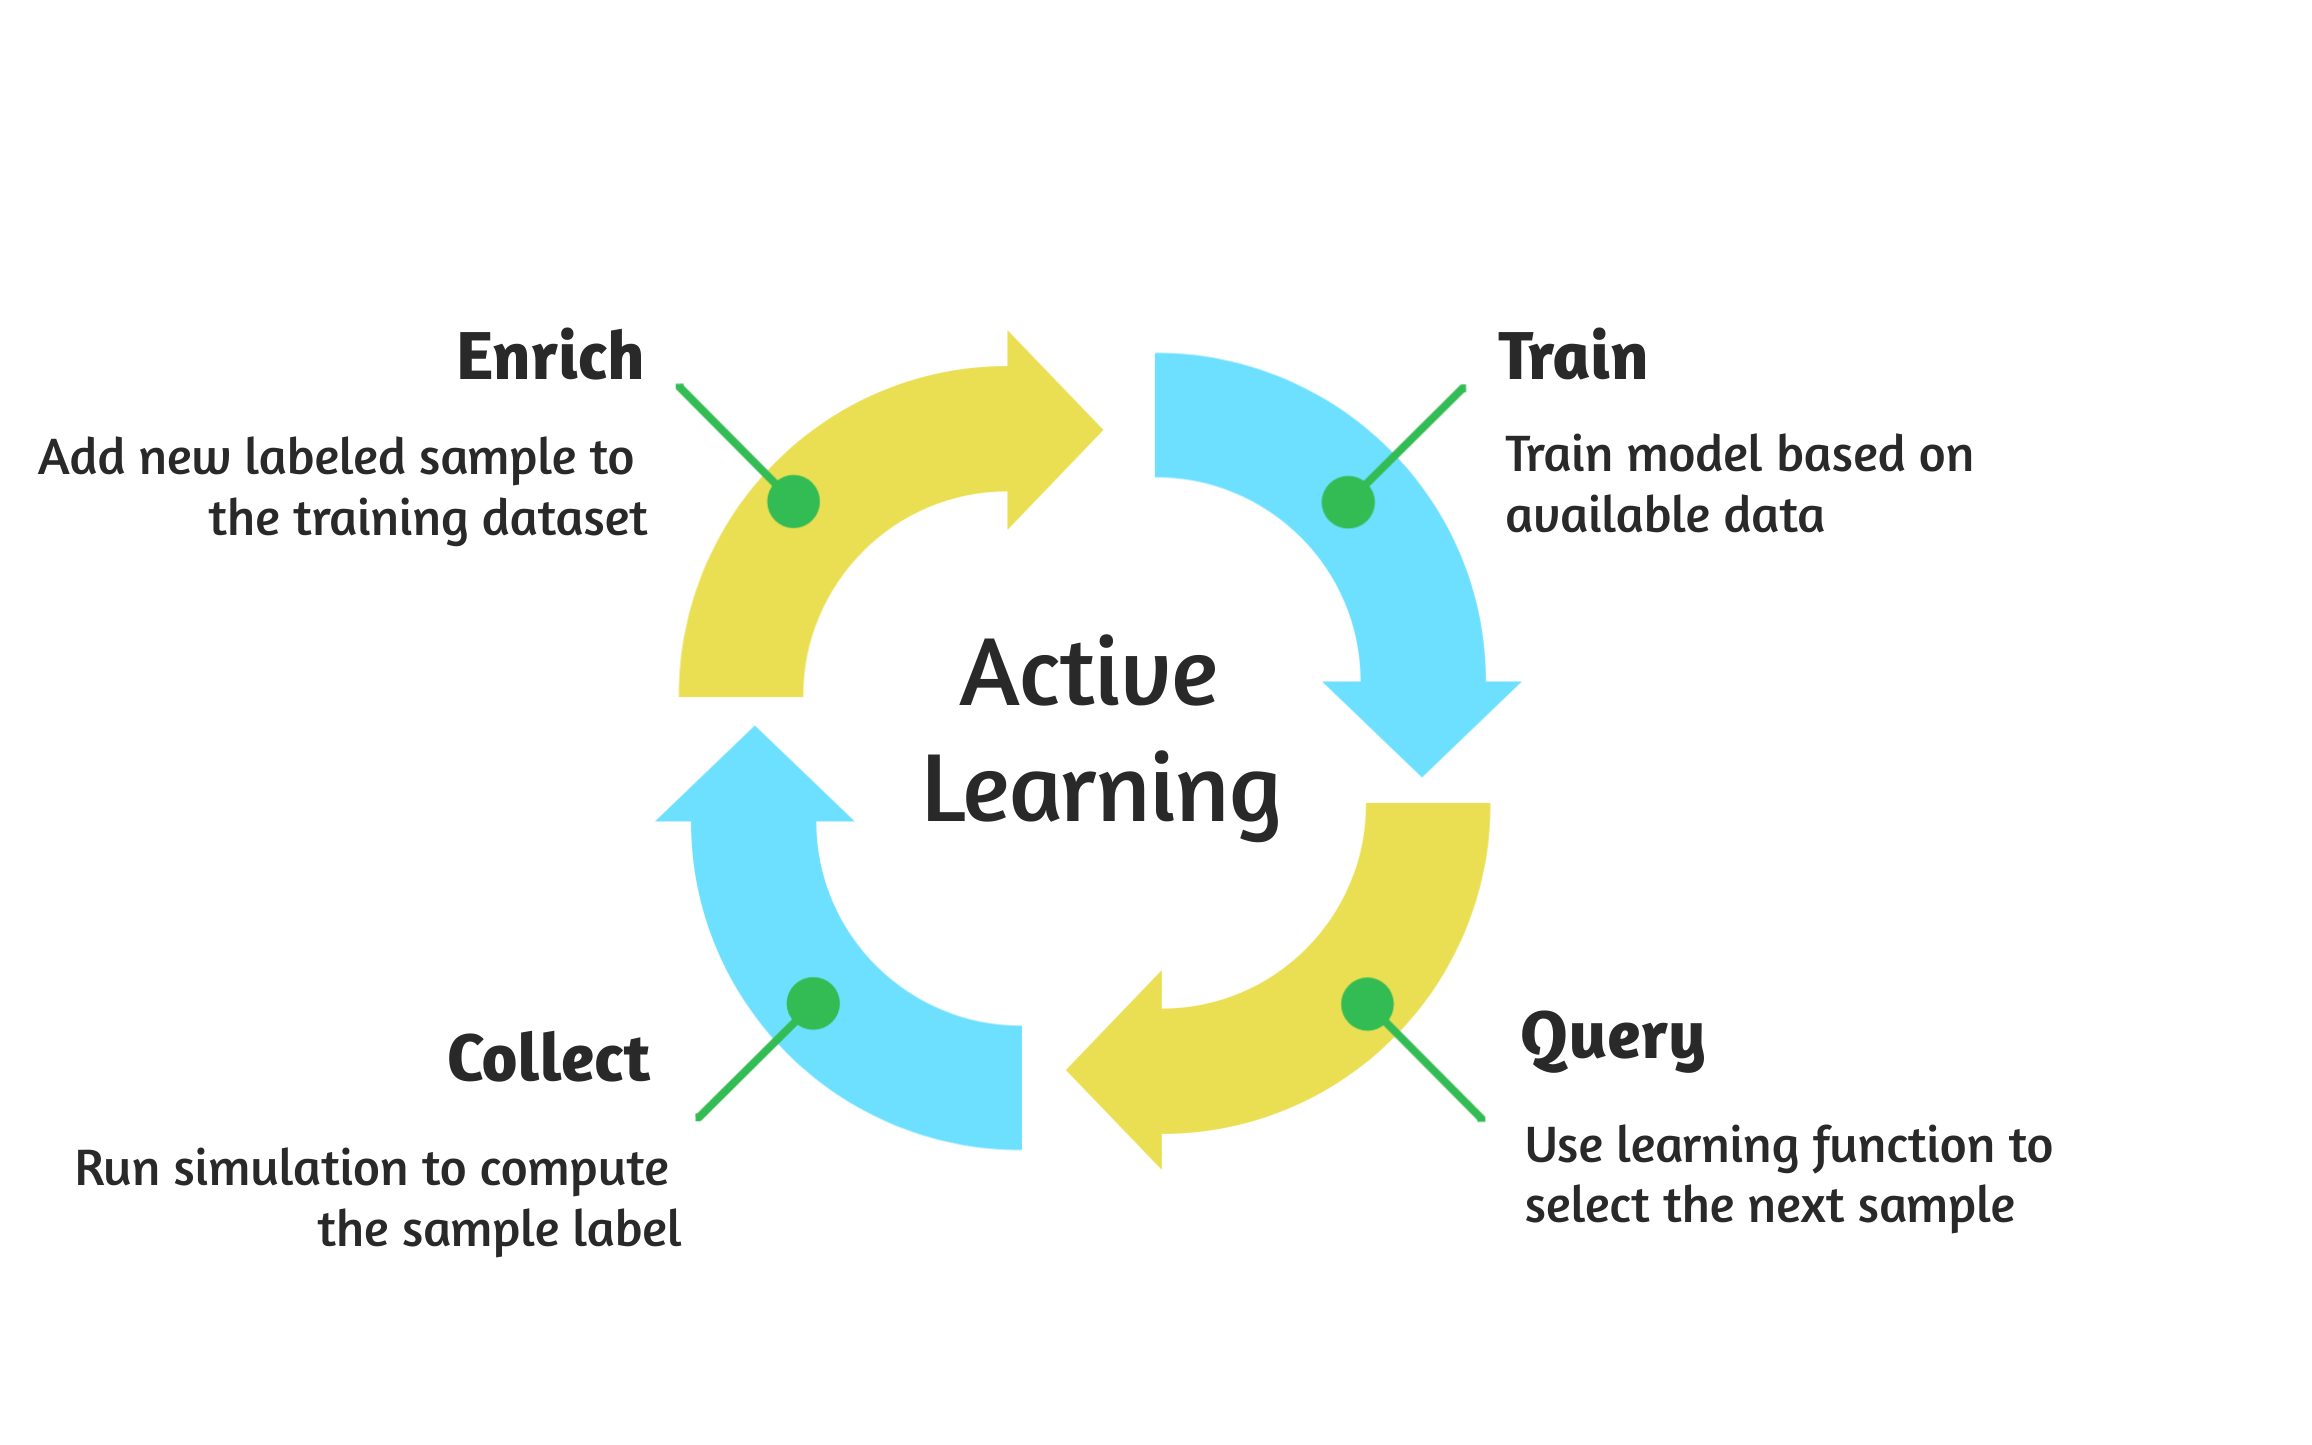

In [ ]:
im=Image.open("Active_Learning.png")
im

In Active learning At each learning iteration, we will look for a sample location x* such that it maximizes a pre-defined learning function. Subsequently, we calculate the true objective value f(x*) and enrich the current training dataset with [x, f(x*)]. Finally, we update the GP model using the enriched dataset, thus completing one learning iteration.

Surrogate model should estimate its own prediction uncertainty, which usually takes the form of the variance or the standard deviation. This is crucial for achieving active learning, as prediction variance represents the state of the surrogate model's knowledge regarding the “landscape” around this specific prediction site.

Various model types in supervised learning offer this kind of prediction uncertainty estimates. Basically, if your model is trained using Bayesian statistics, you could use the posterior predictive distribution as the prediction uncertainty. Our favorite model type is Gaussian Process: it performs quite well in the small data region, plus it assigns a normal distribution to each prediction, meaning that we automatically get the prediction variance to indicate the uncertainty.

Expected Improvement Function {E(I(x))}
we calculate the expected value of Ymin -Y(x)(if Y(x)<Ymin)  and use it to measure the improvement potential

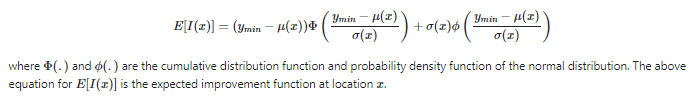

In [ ]:
km = Image.open("Ex(I).png")
km

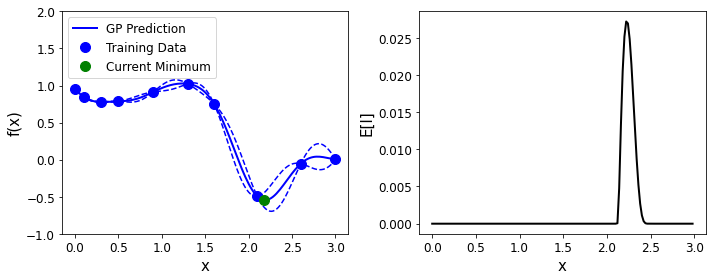

In [ ]:
#First iteration
# Surrogate optimization based on Expected Improvement & Calculate expected improvement 
pred_std = pred_std.reshape(pred_std.shape[0], 1)
EI=(currentobjective-y_pred)*st.norm.cdf((currentobjective-y_pred)/pred_std) \
        +pred_std*st.norm.pdf((currentobjective-y_pred)/pred_std)
# Visually processing expected improvement
fig, axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(x,y_pred,'b-',linewidth=2,label='GP Prediction')
axs[0].plot(x,y_pred+1.95*pred_std,'b--',linewidth=1.5)
axs[0].plot(x,y_pred-1.95*pred_std,'b--',linewidth=1.5)
axs[0].plot(x_train,y_train,'bo',markerfacecolor='b',markersize=10,label='Training Data')
axs[0].set_xlabel('x', fontsize=15)
axs[0].set_ylabel('f(x)', fontsize=15)
axs[0].plot(currentlocation,currentobjective,'go',
        markerfacecolor='g',markersize=10,label='Current Minimum');
axs[0].legend(loc="upper left",prop={'size': 12})
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].set_ylim([-1,2]);

axs[1].plot(x,EI,'k-',linewidth=2)
axs[1].set_xlabel('x', fontsize=15)
axs[1].set_ylabel('E[I]', fontsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout();



In [ ]:
x_train

array([[0. ],
       [0.1],
       [0.3],
       [0.5],
       [0.9],
       [1.3],
       [1.6],
       [2.1],
       [2.6],
       [3. ]])

In [ ]:
x_train

array([[0. ],
       [0.1],
       [0.3],
       [0.5],
       [0.9],
       [1.3],
       [1.6],
       [2.1],
       [2.6],
       [3. ]])

In the graph of distribution E[I] we can see that there are 2 spikes near x=2.25 and so we chose x*=2.25 from the first iteration in the next sample
Before that we need to define EI_learning function which will help us in further calculations

In [ ]:
# Expected Improvement-based active learning function
def EI_learning(candidates, y_pred, pred_std):
    """Active learning function based on expected improvement
       
       This function selects a new sample from candidate pool to enrich the current training dataset.
       The sample gets selected if it has the maximum expected improvement value.
       
       Input: 
       - candidates: pool of candidates to select sample from
       - y_pred: GP predictions on candidate samples
       - pred_std: Standard deviation of the GP predictions on candidate samples
       
       Output:
       - new_sample: the selected sample with the maximum expected improvement value
       - EI: EI values of the candidate samples
    """
    
    # 1-Find the current minimum
    currentobjective = y_pred[np.argmin(y_pred)]
    
    # 2-Calculate the EI values of the candidate samples
    pred_std = pred_std.reshape(pred_std.shape[0], 1)
    EI = (currentobjective-y_pred)*st.norm.cdf((currentobjective-y_pred)/pred_std) \
            +pred_std*st.norm.pdf((currentobjective-y_pred)/pred_std)
    
    # 3-Select a new sample
    new_sample = candidates[np.argmax(EI)]
    
    return new_sample, EI

In [ ]:
#Surrogate optimizations Iterations
Samples = np.arange(0,3.00,0.02)
iteration = 0

In [ ]:
# 1-GP model training and predicting
model.fit(x_train, y_train)
y_pred, pred_std = model.predict(Samples.reshape((-1, 1)), return_std=True)
y_test_pred, pred_test_std = model.predict(x.reshape((-1, 1)), return_std=True)
pred_test_std = pred_test_std.reshape(pred_test_std.shape[0], 1)

# 2-Calculate the current minimum
current_min = y_pred[np.argmin(y_pred),0]
location = Samples[np.argmin(y_pred)]

# 3-Select next sample
pred_std += 1e-8        # To prevent zero standard deviation value
new_sample, EI = EI_learning(Samples, y_pred, pred_std)

# 4-Calculate the true label of the new sample
y_sample = np.sin(new_sample**new_sample)/(2**((new_sample**new_sample-pi/2)/pi))


# 5-Display iteration info
summary = 'Iteration summary:'
iter_number = 'Current iteration: {}'.format(str(iteration))

Iteration_summary = 'Iteration {}:'.format(str(iteration)) \
                    + os.linesep \
                    + 'the current minimum is {}'.format(str(current_min)) \
                    + os.linesep \
                    + 'located at {}'.format(str(location))

print(Iteration_summary)

Iteration 0:
the current minimum is -0.5442185170072003
located at 2.18


In [ ]:
x_train

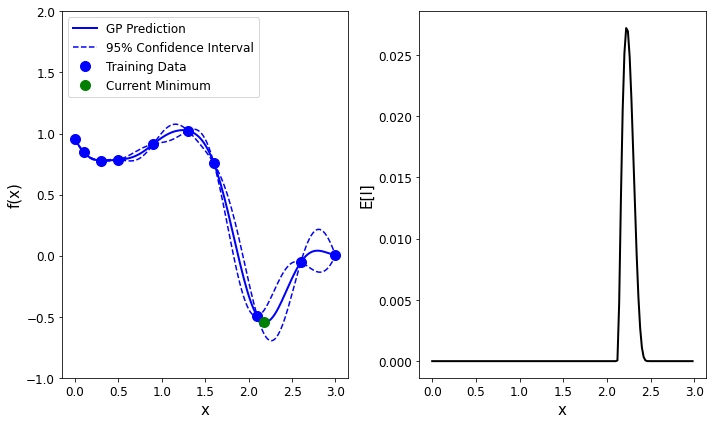

In [ ]:
# 6-Iteration assessment
fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].plot(x,y_test_pred,'b-',linewidth=2,label='GP Prediction')
axs[0].plot(x,y_test_pred+1.95*pred_test_std,'b--',linewidth=1.5)
axs[0].plot(x,y_test_pred-1.95*pred_test_std,'b--',linewidth=1.5,label='95% Confidence Interval')
axs[0].plot(x_train,y_train,'bo',markerfacecolor='b',markersize=10,label='Training Data')
axs[0].set_xlabel('x', fontsize=15)
axs[0].set_ylabel('f(x)', fontsize=15)
axs[0].plot(location,current_min,'go',
        markerfacecolor='g',markersize=10,label='Current Minimum');
axs[0].legend(loc="upper left",prop={'size': 12})
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].set_ylim([-1,2]);

axs[1].plot(x,EI,'k-',linewidth=2)
axs[1].set_xlabel('x', fontsize=15)
axs[1].set_ylabel('E[I]', fontsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout();
fig.savefig('Later_iteration.png')

# 7-Enrich training dataset
x_train = np.vstack((x_train,new_sample))
y_train = np.vstack((y_train,y_sample))
iteration += 1

In [ ]:
x_train

array([[0.  ],
       [0.1 ],
       [0.3 ],
       [0.5 ],
       [0.9 ],
       [1.3 ],
       [1.6 ],
       [2.1 ],
       [2.6 ],
       [3.  ],
       [2.22]])

In [ ]:
# 1-GP model training and predicting
model.fit(x_train, y_train)
y_pred, pred_std = model.predict(Samples.reshape((-1, 1)), return_std=True)
y_test_pred, pred_test_std = model.predict(x.reshape((-1, 1)), return_std=True)
pred_test_std = pred_test_std.reshape(pred_test_std.shape[0], 1)

# 2-Calculate the current minimum
current_min = y_pred[np.argmin(y_pred),0]
location = Samples[np.argmin(y_pred)]

# 3-Select next sample
pred_std += 1e-8        # To prevent zero standard deviation value
new_sample, EI = EI_learning(Samples, y_pred, pred_std)

# 4-Calculate the true label of the new sample
y_sample = np.sin(new_sample**new_sample)/(2**((new_sample**new_sample-pi/2)/pi))

# 5-Display iteration info
summary = 'Iteration summary:'
iter_number = 'Current iteration: {}'.format(str(iteration))

Iteration_summary = 'Iteration {}:'.format(str(iteration)) \
                    + os.linesep \
                    + 'the current minimum is {}'.format(str(current_min)) \
                    + os.linesep \
                    + 'located at {}'.format(str(location))

print(Iteration_summary)

Iteration 1:
the current minimum is -0.6014156457453208
located at 2.0


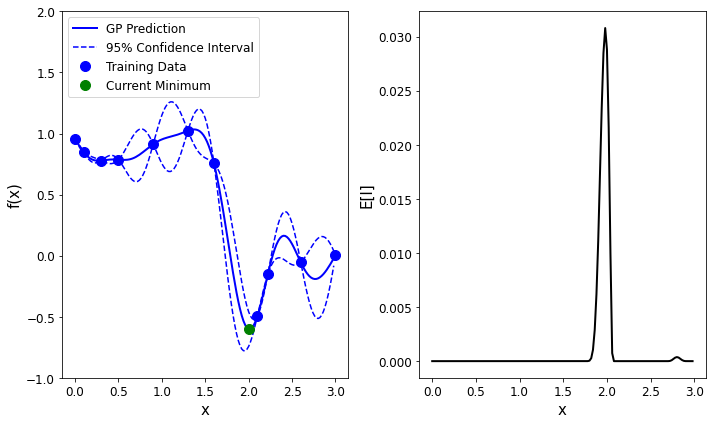

In [ ]:
# 6-Iteration assessment
fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].plot(x,y_test_pred,'b-',linewidth=2,label='GP Prediction')
axs[0].plot(x,y_test_pred+1.95*pred_test_std,'b--',linewidth=1.5)
axs[0].plot(x,y_test_pred-1.95*pred_test_std,'b--',linewidth=1.5,label='95% Confidence Interval')
axs[0].plot(x_train,y_train,'bo',markerfacecolor='b',markersize=10,label='Training Data')
axs[0].set_xlabel('x', fontsize=15)
axs[0].set_ylabel('f(x)', fontsize=15)
axs[0].plot(location,current_min,'go',
        markerfacecolor='g',markersize=10,label='Current Minimum');
axs[0].legend(loc="upper left",prop={'size': 12})
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].set_ylim([-1,2]);

axs[1].plot(x,EI,'k-',linewidth=2)
axs[1].set_xlabel('x', fontsize=15)
axs[1].set_ylabel('E[I]', fontsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout();
fig.savefig('Later_iteration.png')

# 7-Enrich training dataset
x_train = np.vstack((x_train,new_sample))
y_train = np.vstack((y_train,y_sample))
iteration += 1

In [ ]:
# 1-GP model training and predicting
model.fit(x_train, y_train)
y_pred, pred_std = model.predict(Samples.reshape((-1, 1)), return_std=True)
y_test_pred, pred_test_std = model.predict(x.reshape((-1, 1)), return_std=True)
pred_test_std = pred_test_std.reshape(pred_test_std.shape[0], 1)

# 2-Calculate the current minimum
current_min = y_pred[np.argmin(y_pred),0]
location = Samples[np.argmin(y_pred)]

# 3-Select next sample
pred_std += 1e-8        # To prevent zero standard deviation value
new_sample, EI = EI_learning(Samples, y_pred, pred_std)

# 4-Calculate the true label of the new sample
y_sample = (new_sample*6-2)**2*np.sin(new_sample*12-4)

# 5-Display iteration info
summary = 'Iteration summary:'
iter_number = 'Current iteration: {}'.format(str(iteration))

Iteration_summary = 'Iteration {}:'.format(str(iteration)) \
                    + os.linesep \
                    + 'the current minimum is {}'.format(str(current_min)) \
                    + os.linesep \
                    + 'located at {}'.format(str(location))

print(Iteration_summary)

Iteration 2:
the current minimum is -0.520245414405697
located at 2.06


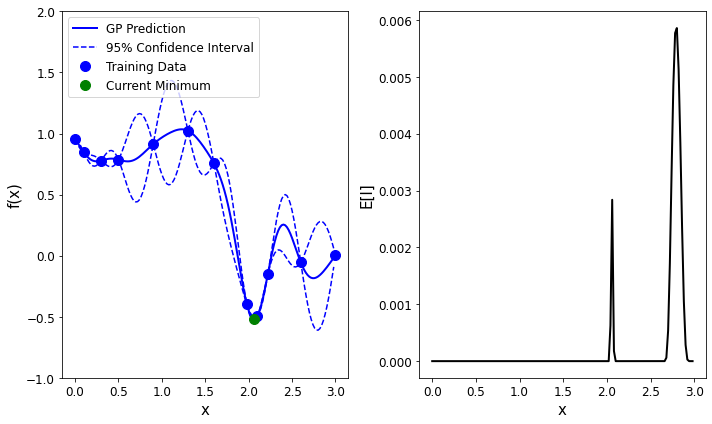

In [ ]:
# 6-Iteration assessment
fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].plot(x,y_test_pred,'b-',linewidth=2,label='GP Prediction')
axs[0].plot(x,y_test_pred+1.95*pred_test_std,'b--',linewidth=1.5)
axs[0].plot(x,y_test_pred-1.95*pred_test_std,'b--',linewidth=1.5,label='95% Confidence Interval')
axs[0].plot(x_train,y_train,'bo',markerfacecolor='b',markersize=10,label='Training Data')
axs[0].set_xlabel('x', fontsize=15)
axs[0].set_ylabel('f(x)', fontsize=15)
axs[0].plot(location,current_min,'go',
        markerfacecolor='g',markersize=10,label='Current Minimum');
axs[0].legend(loc="upper left",prop={'size': 12})
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].set_ylim([-1,2]);

axs[1].plot(x,EI,'k-',linewidth=2)
axs[1].set_xlabel('x', fontsize=15)
axs[1].set_ylabel('E[I]', fontsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout();
fig.savefig('Later_iteration.png')

# 7-Enrich training dataset
x_train = np.vstack((x_train,new_sample))
y_train = np.vstack((y_train,y_sample))
iteration += 1

After 3 iterations we see there is chaos and increase in area of 95% confidence interval in the graph but in the 2nd iteration the model is highly confident and has a reasonable 95% confidence interval is its prediction that global minima is at x = 2.06